In [939]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import uncrater as uc
from uncrater.utils import cordic2rad, rad2cordic, cordic_add
alpha_to_pdrift = 50e3*4096*16/102.4e6*2*np.pi*1e-6

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1900]:
import json
def read_adc(ch):
    jdata = json.load(open(f'/u/home/anze/Nov21/adc{ch}_output.json'))
    data = np.array(jdata['data'])
    data[data>8192]-=16384
    return data

ewf = [read_adc(ch+1) for ch in range(4)]

def spec(w):
    return np.abs(np.fft.rfft(w)**2)

Analyzing 371 files from session_calibrator/cdi_output.
Analyzing 455 files from session_calibrator_+20/cdi_output.


(np.float64(1.579628027528231e-06), np.float64(1.2218353615369517e-06))

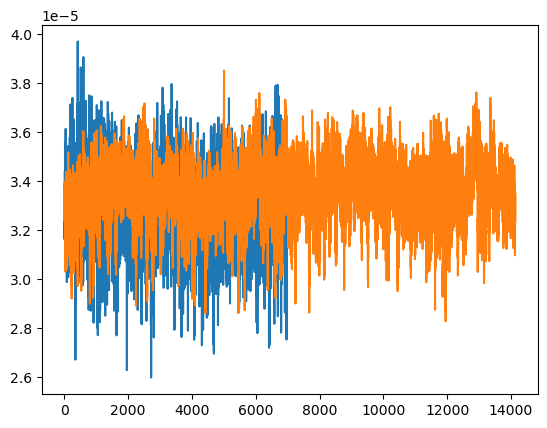

In [2065]:
C = uc.Collection("session_calibrator/cdi_output")
C.cut_to_hello()

Cd = uc.Collection("session_calibrator_+20/cdi_output")
Cd.cut_to_hello()
plt.plot(C.cd_drift[200:])
plt.plot(Cd.cd_drift[200:])
C.cd_drift[200:].std(),Cd.cd_drift[200:].std()

[]

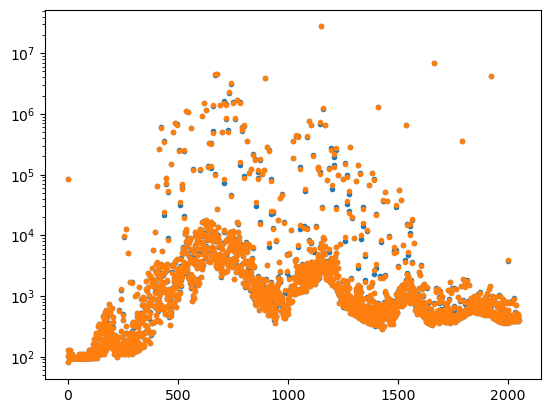

In [2037]:
for i in [0,7]:
    plt.plot(np.mean(np.array([sp[2].data[:] for sp in C.spectra[i::8]]),axis=0),'.')
plt.semilogy()

([np.float64(1358.0),
  np.float64(1380.0),
  np.float64(1407.0),
  np.float64(1405.0),
  np.float64(1435.0),
  np.float64(1412.0),
  np.float64(1403.0),
  np.float64(1406.0),
  np.float64(1417.0),
  np.float64(1402.0),
  np.float64(1401.0),
  np.float64(1403.0),
  np.float64(1473.0),
  np.float64(1418.0),
  np.float64(1406.0),
  np.float64(1382.0),
  np.float64(1404.0),
  np.float64(1391.0),
  np.float64(1405.0),
  np.float64(1405.0),
  np.float64(1460.0),
  np.float64(1396.0),
  np.float64(1401.0),
  np.float64(1379.0),
  np.float64(1402.0),
  np.float64(1418.0),
  np.float64(1406.0),
  np.float64(1422.0),
  np.float64(1471.0),
  np.float64(1415.0),
  np.float64(1413.0),
  np.float64(1435.0),
  np.float64(1432.0),
  np.float64(1414.0),
  np.float64(1414.0),
  np.float64(1410.0),
  np.float64(1456.0),
  np.float64(1412.0),
  np.float64(1422.0),
  np.float64(1412.0),
  np.float64(1427.0),
  np.float64(1418.0),
  np.float64(1406.0),
  np.float64(1400.0),
  np.float64(1451.0),
  np.float

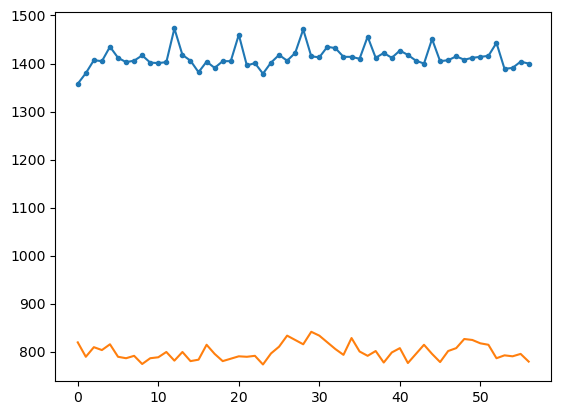

In [2038]:
plt.plot([sp[1].data[1201] for sp in C.spectra],'.-')
#plt.plot([sp[2].data[1202] for sp in C.spectra])
plt.plot([sp[0].data[1203] for sp in C.spectra])

13+(22-13)*25/len(C.spectra)

[sp[1].data[1201] for sp in C.spectra],


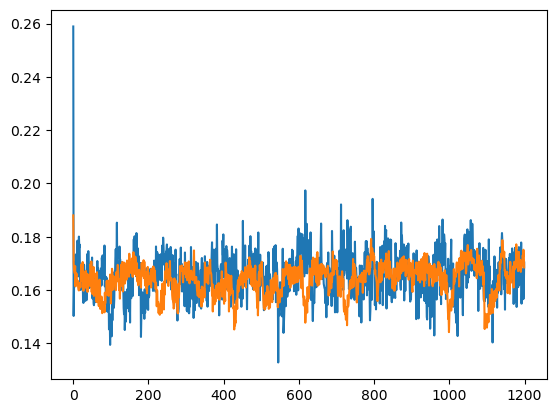

In [2039]:
plt.plot(C.cd_drift[:1200]/alpha_to_pdrift)
plt.plot(Cd.cd_drift[:1200]/alpha_to_pdrift)



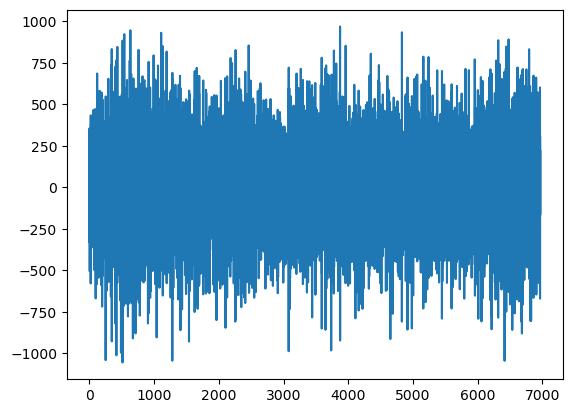

In [2040]:
plt.plot (C.cd_fdx[200:])
#plt.plot (Cd.cd_snr2[200:])
#plt.plot (C.cd_snr3[200:])
#plt.plot(C.cd_powerbot3)

np.float64(0.14881377565574022)

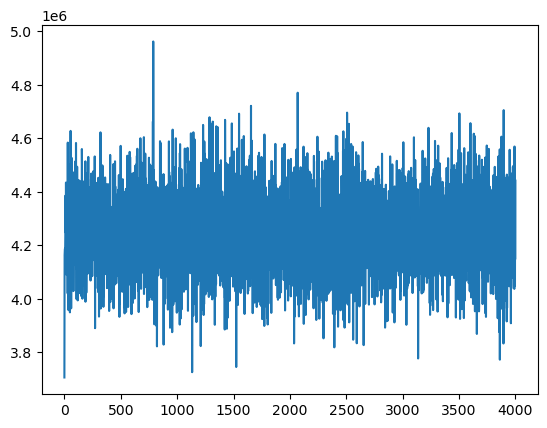

In [2041]:
plt.plot(C.cd_powertop2[:4000])
C.cd_powerbot2[:4000].std()/C.cd_powerbot2[:4000].mean()
#Cd.cd_powertop2[1000:3000].mean()/C.cd_powertop2[1000:3000].mean()

In [2042]:
C.calib_meta[0].state.sum2_slice

17

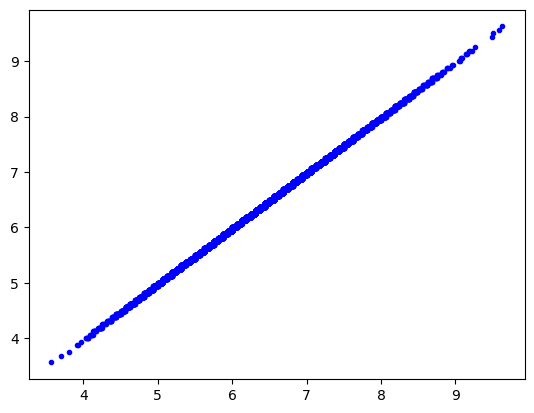

In [2043]:
#plt.plot(Cd.cd_snr1[200:])
plt.plot(C.cd_powertop1[200:]/C.cd_powerbot1[200:], C.cd_snr1[200:],'b.')
#plt.plot()


#plt.plot(C.cd_fd2[1200:])
#plt.plot(C.cd_fd3[1200:])


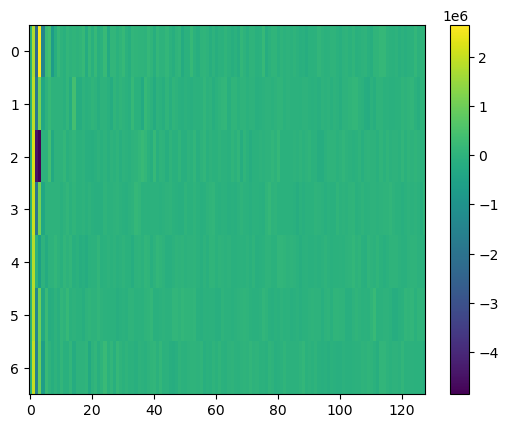

In [2044]:
plt.imshow(C.calib_gphase[:,:128],aspect='auto', interpolation='nearest')
plt.colorbar()

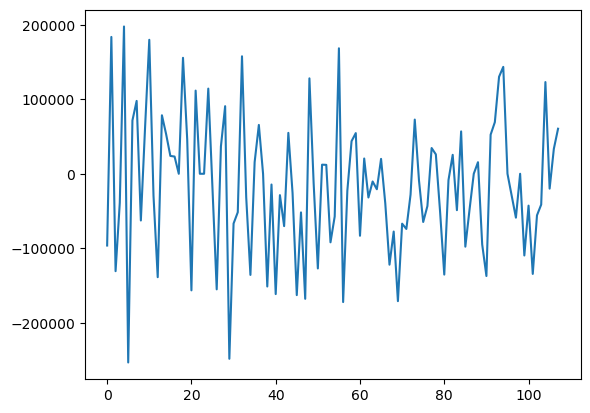

In [2045]:
plt.plot(C.calib_gphase[0,20:128])

[]

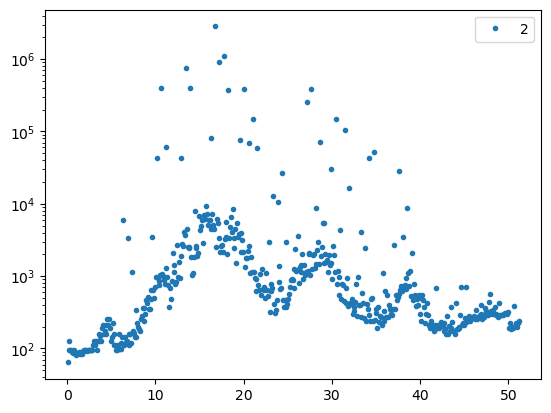

In [2046]:
f = C.spectra[0][0].frequency
s0 = C.spectra[0][3].data[:]
s1 = C.spectra[1][3].data[:]
s2 = C.spectra[2][3].data[:]
#plt.plot(f,s2)
for i in [2]:
    plt.plot(f[i::4], s2[i::4],'.', label=str(i))
plt.legend()
#plt.plot(s1,'g.')
#plt.plot(s2,'b.')
#plt.plot(s1*0.001,'r.')

plt.semilogy()

Text(0, 0.5, 'power')

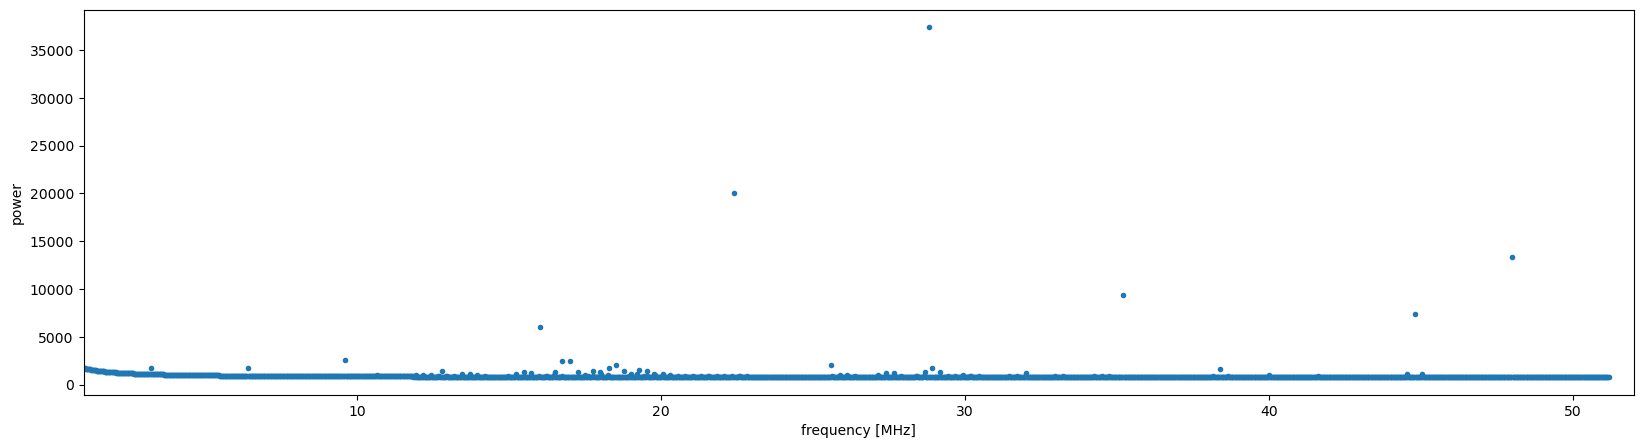

In [2047]:

plt.figure(figsize=(20,5))
f = C.spectra[0][0].frequency
for i in [0]:
    s = np.mean([sp[i].data[:] for sp in C.spectra],axis=0)
    plt.plot(f[10:],s[10:],'.')

#plt.plot(f[2::4],s[2::4],'r.',markersize=3)
plt.xlim(1,52)
#plt.ylim(0,1e4)
#plt.ylim(3.0e6,5e6)
#plt.ylim(0.1e3,2e6)
#plt.ylim(3e6,2e7)
#plt.semilogy()
plt.xlabel('frequency [MHz]')
plt.ylabel('power')

Text(0, 0.5, 'power')

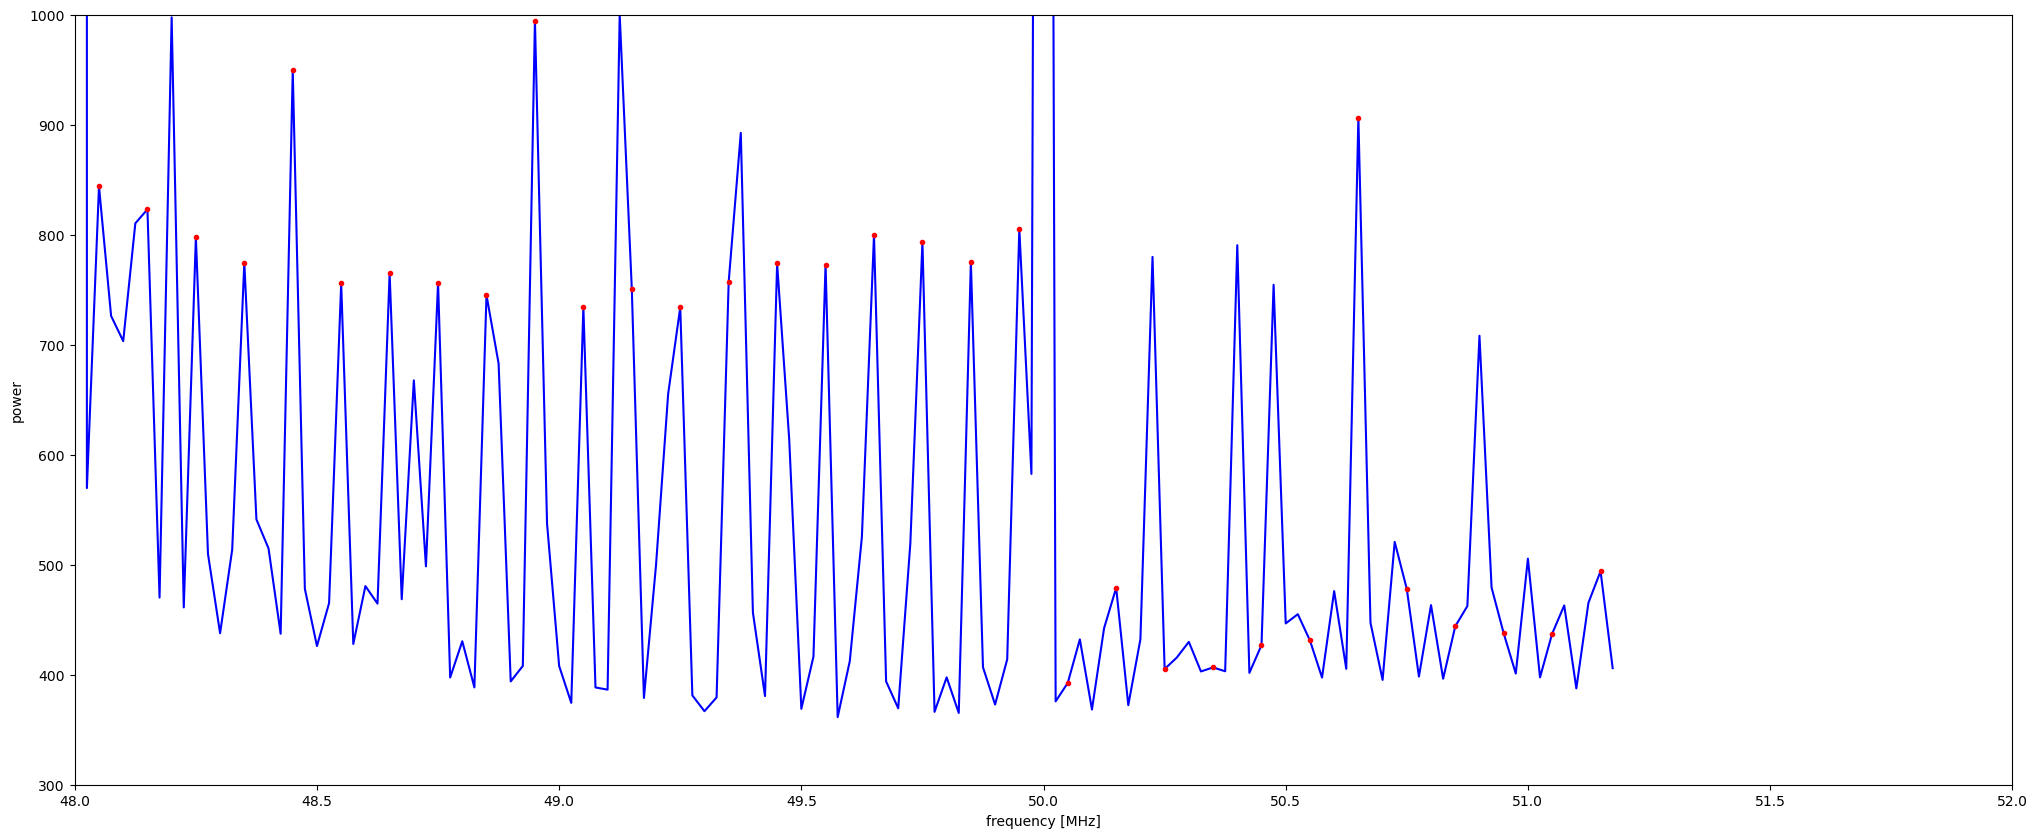

In [2063]:

plt.figure(figsize=(25,10))
f = C.spectra[2][0].frequency
s = np.mean([sp[2].data[:] for sp in C.spectra],axis=0)
plt.plot(f,s,'b-')
#plt.plot(f,s*1.03,'k-')
plt.plot(f[2::4],s[2::4],'ro',markersize=3)

plt.ylim(3e2,1e3)
plt.xlim(48,52)
#plt.semilogy()
plt.xlabel('frequency [MHz]')
plt.ylabel('power')

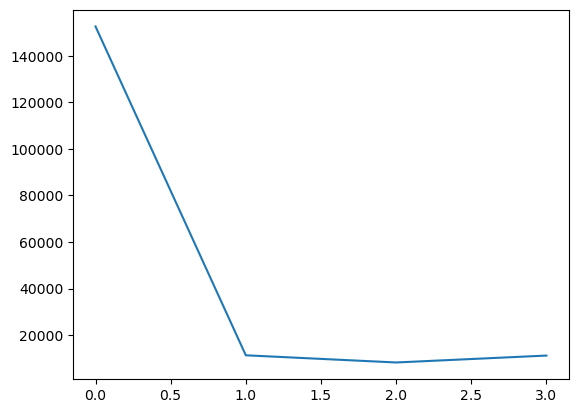

In [2049]:
plt.plot(s[900::].reshape(-1,4).mean(axis=0))

In [2050]:
kcomb = np.arange(512)*4+2

def phase_up (first, second):
    """ Phases up second waveform to the first one """
    Nfft= len(first)*1024
    cross= first*np.conj(second)
    fi = np.zeros(Nfft,complex)
    fi[kcomb] = cross
    xi = np.real(np.fft.fft(fi))
    phi = xi.argmax()*2*np.pi/len(xi)
    second_phased = np.exp(+1j*phi*kcomb)*second
    return second_phased
    

In [ ]:
_,wf = np.loadtxt("calibrator_231001.txt").T
wf = np.fft.rfft(np.hstack((wf,wf)))
wf = wf[2::4]

In [2119]:
calib_data = []

for ch in range(4):
    first = C.calib_data[-1,ch,:]
    for second in C.calib_data[-2:1:-1,ch,:]:
        second_phased = phase_up(first,second)
        first += second_phased
        #plt.plot(np.angle(first[20:]/second_phased[20:]))
        #plt.plot(second_phased[20:])
        #stop()
    calib_data.append(first)
calib_data = np.array(calib_data)
#plt.plot(np.abs(calib_data[2,:]))


In [2122]:
calib_data_wf = []
for ch in range(4):
    first = np.zeros(512,dtype=complex)
    for second in C.calib_data[1:,ch,:]:
        second_phased = phase_up(wf,second)
        first += second_phased
        #plt.plot(np.angle(first[20:]/second_phased[20:]))
        #plt.plot(second_phased[20:])
        #stop()
    calib_data_wf.append(first)
calib_data_wf = np.array(calib_data_wf)


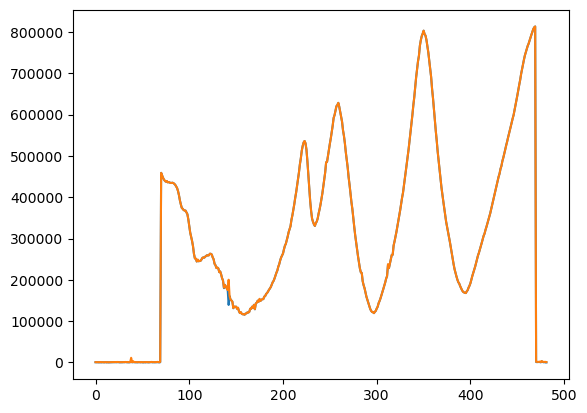

In [2125]:
plt.plot(np.abs(calib_data_wf[2,30:]))
plt.plot(np.abs(C.calib_data[1:,2,30:]).mean(axis=0)*6)

In [ ]:
plt.plot(np.abs(calib_data[2,30:]))
plt.plot(np.abs(C.calib_data[1:,2,30:]).mean(axis=0)*4)

[]

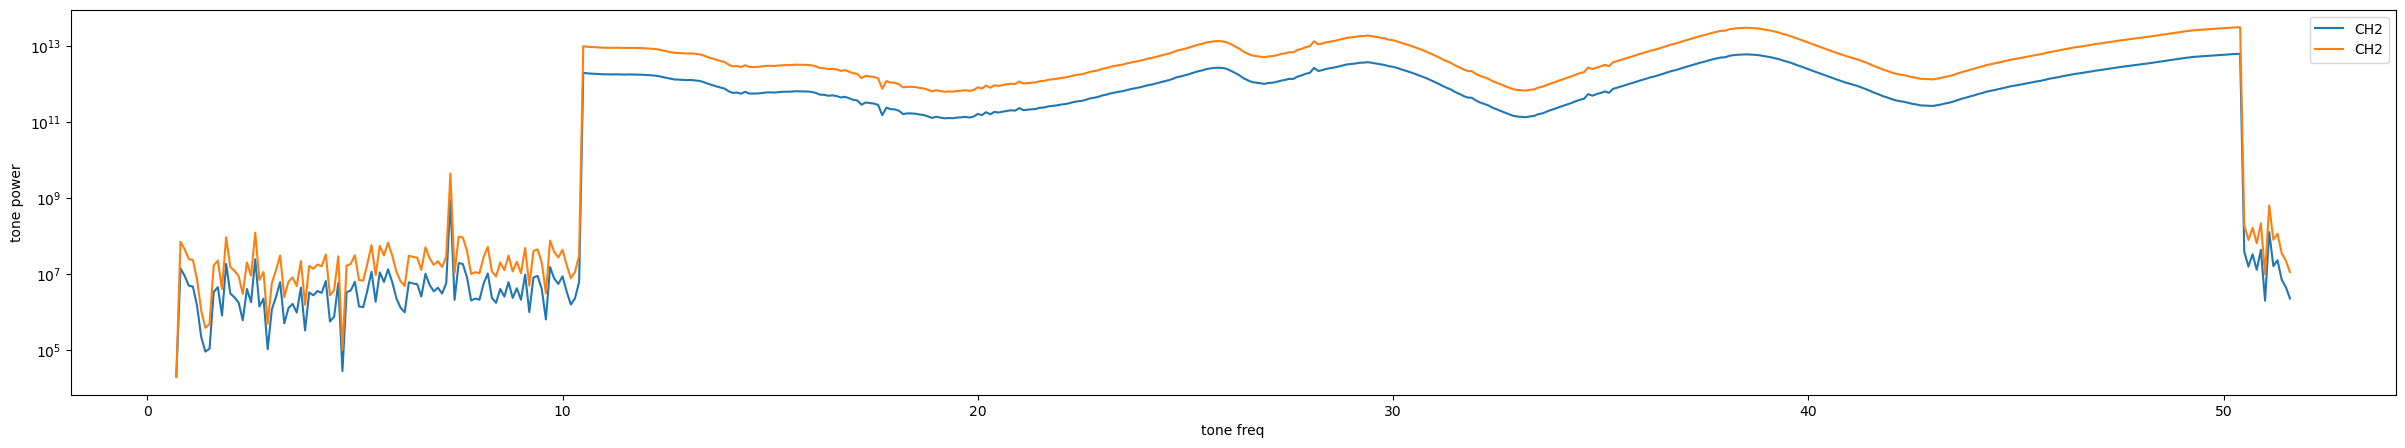

In [2024]:
plt.figure(figsize=(30,5))
tfreq=0.5+0.1*np.arange(512)
for ch in [2]:#range(0,4):
    plt.plot(tfreq[2:],np.abs(C.calib_data[1:,ch,2:]**2).mean(axis=0),label='CH'+str(ch))
    plt.plot(tfreq[2:],np.abs(calib_data[ch,2:]**2),label='CH'+str(ch))
    #plt.plot(tfreq[2:],np.abs(Cd.calib_data[0:1,ch,2:]**2).mean(axis=0)*4,label='CH'+str(ch))
    #plt.plot(np.abs(Cx.calib_data[ch,1:,:]**1).mean(axis=0), label='CH'+str(ch))

    #plt.plot(np.abs(C.calib_data[ch,1:,100:500]**1).mean(axis=0)/np.abs(Cx.calib_data[ch,1:,100:500]**1).mean(axis=0), label='CH'+str(ch))


plt.legend()
plt.xlabel('tone freq')
plt.ylabel('tone power')

#i1= np.real(C.calib_data[2,:,400])
#i2=np.imag(C.calib_data[2,:,400])
#i3= np.real(C.calib_data[3,:,400])
#plt.plot(np.imag(C.calib_data[3,:,100]))
#plt.plot(C.calib_data[0,:,400])
#plt.plot(r3**2+i3**2)

plt.semilogy()


[]

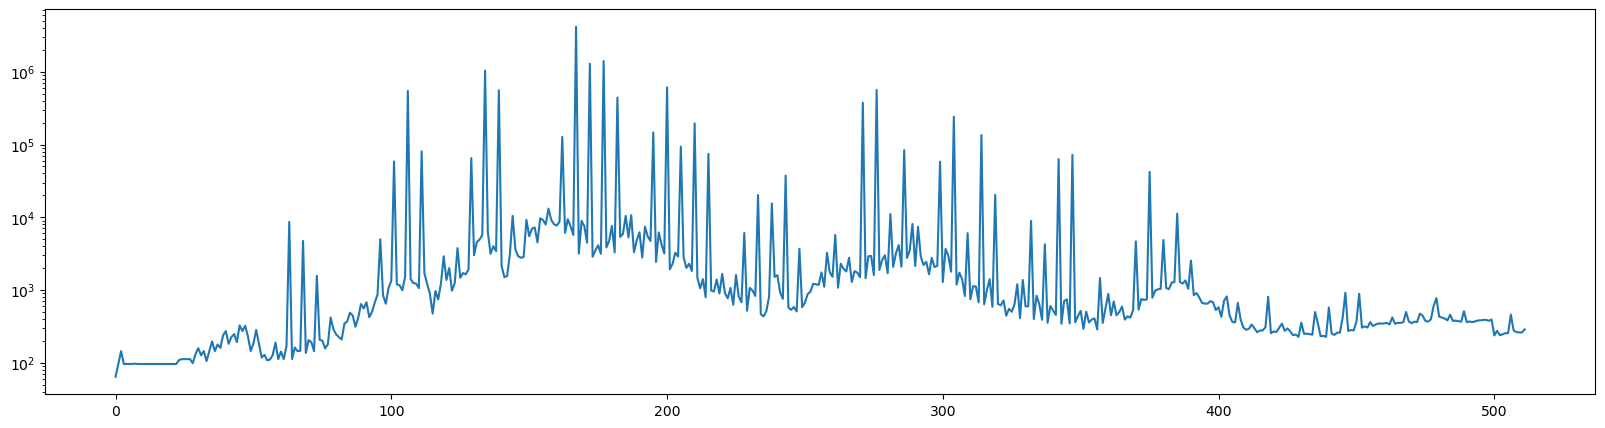

In [1917]:
ch = 1
s = np.mean([sp[ch].data[:] for sp in C.spectra],axis=0)[2::4]
c = np.abs(C.calib_data[:,ch,:]**2).mean(axis=0)
fac = s[400]/c[400]*0.25
plt.figure(figsize=(20,5))
plt.plot(s)
#plt.plot(c*fac,'.c-')
plt.semilogy()

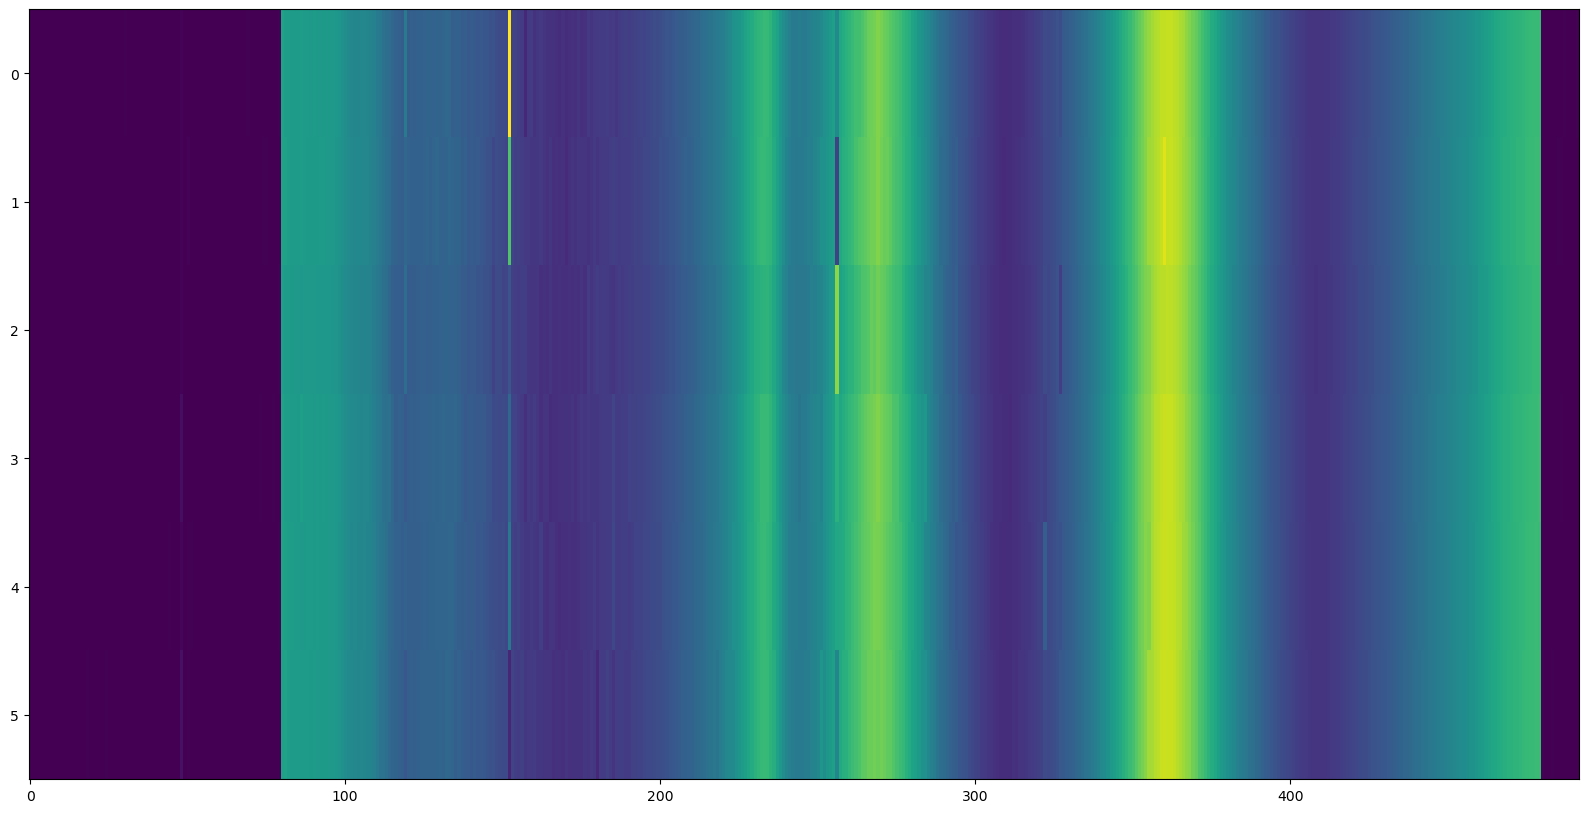

In [1921]:
plt.figure(figsize=(20,10))
plt.imshow(np.abs(C.calib_data[:,ch,20:]),aspect='auto',interpolation='nearest')

In [2126]:
pcalib = phase_up(wf,calib_data_wf[1,:])

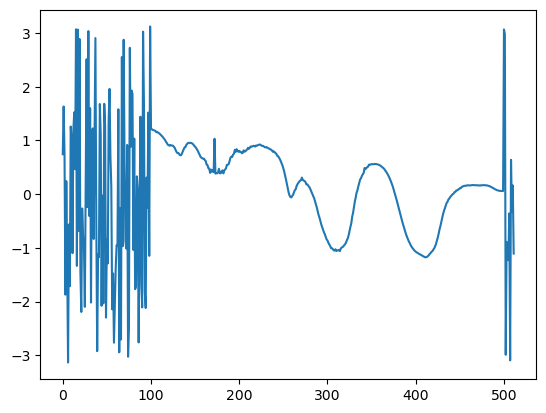

In [ ]:
#plt.plot(np.angle(calib_data[1,:]/wf))
plt.plot(np.angle(pcalib/wf))

#plt.plot(np.imag(pcalib/wf))

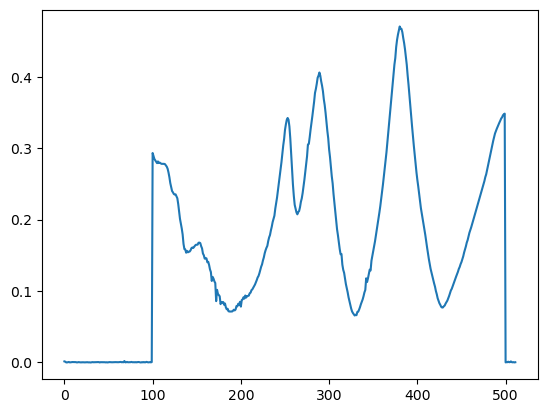

In [2129]:
plt.plot(np.abs(pcalib/wf))